In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
data = pd.read_csv("jena_climate_2009_2016.csv")

In [3]:
data

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.40,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.90,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.20,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.10,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420446,31.12.2016 23:20:00,1000.07,-4.05,269.10,-8.13,73.10,4.52,3.30,1.22,2.06,3.30,1292.98,0.67,1.52,240.0
420447,31.12.2016 23:30:00,999.93,-3.35,269.81,-8.06,69.71,4.77,3.32,1.44,2.07,3.32,1289.44,1.14,1.92,234.3
420448,31.12.2016 23:40:00,999.82,-3.16,270.01,-8.21,67.91,4.84,3.28,1.55,2.05,3.28,1288.39,1.08,2.00,215.2
420449,31.12.2016 23:50:00,999.81,-4.23,268.94,-8.53,71.80,4.46,3.20,1.26,1.99,3.20,1293.56,1.49,2.16,225.8


In [5]:
TempData = data[['Date Time', 'T (degC)', 'Tdew (degC)']]
TempData

,Date Time,T (degC),Tdew (degC)
0,01.01.2009 00:10:00,-8.02,-8.90
1,01.01.2009 00:20:00,-8.41,-9.28
2,01.01.2009 00:30:00,-8.51,-9.31
3,01.01.2009 00:40:00,-8.31,-9.07
4,01.01.2009 00:50:00,-8.27,-9.04
...,...,...,...
420446,31.12.2016 23:20:00,-4.05,-8.13
420447,31.12.2016 23:30:00,-3.35,-8.06
420448,31.12.2016 23:40:00,-3.16,-8.21
420449,31.12.2016 23:50:00,-4.23,-8.53


<AxesSubplot: >

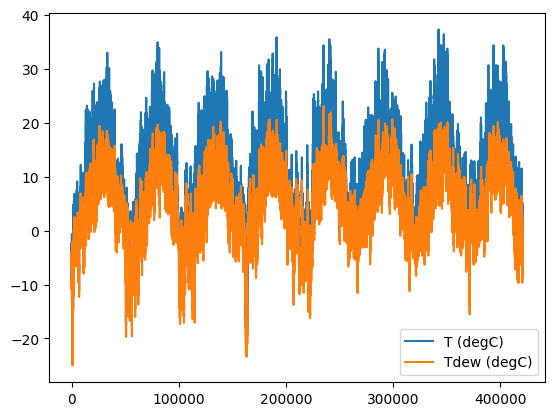

In [6]:
TempData.plot()

In [7]:
TempData['T (degC)'] = (TempData['T (degC)'] - TempData['T (degC)'].mean())/TempData['T (degC)'].std()
TempData['Tdew (degC)'] = (TempData['Tdew (degC)'] - TempData['Tdew (degC)'].mean())/TempData['Tdew (degC)'].std()
TempData

C:\Users\ZZ099Y820\AppData\Local\Temp\ipykernel_11804\209256123.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TempData['T (degC)'] = (TempData['T (degC)'] - TempData['T (degC)'].mean())/TempData['T (degC)'].std()
C:\Users\ZZ099Y820\AppData\Local\Temp\ipykernel_11804\209256123.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TempData['Tdew (degC)'] = (TempData['Tdew (degC)'] - TempData['Tdew (degC)'].mean())/TempData['Tdew (degC)'].std()


,Date Time,T (degC),Tdew (degC)
0,01.01.2009 00:10:00,-2.073744,-2.058420
1,01.01.2009 00:20:00,-2.120042,-2.114880
2,01.01.2009 00:30:00,-2.131913,-2.119337
3,01.01.2009 00:40:00,-2.108171,-2.083678
4,01.01.2009 00:50:00,-2.103422,-2.079221
...,...,...,...
420446,31.12.2016 23:20:00,-1.602454,-1.944014
420447,31.12.2016 23:30:00,-1.519355,-1.933613
420448,31.12.2016 23:40:00,-1.496799,-1.955900
420449,31.12.2016 23:50:00,-1.623822,-2.003445


<AxesSubplot: >

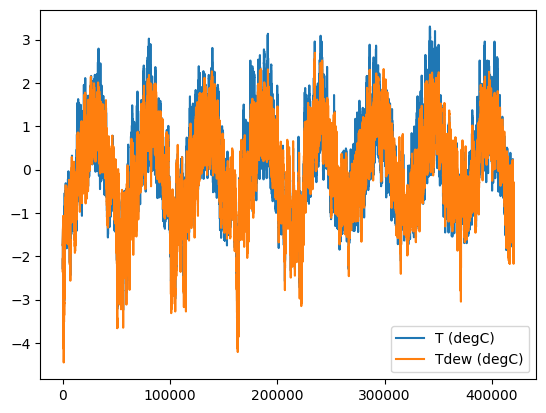

In [8]:
TempData.plot()

In [9]:
data.drop('Date Time', inplace=True, axis=1)

In [10]:
data

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,996.52,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,996.57,-8.41,265.01,-9.28,93.40,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,996.53,-8.51,264.91,-9.31,93.90,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,996.51,-8.31,265.12,-9.07,94.20,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,996.51,-8.27,265.15,-9.04,94.10,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420446,1000.07,-4.05,269.10,-8.13,73.10,4.52,3.30,1.22,2.06,3.30,1292.98,0.67,1.52,240.0
420447,999.93,-3.35,269.81,-8.06,69.71,4.77,3.32,1.44,2.07,3.32,1289.44,1.14,1.92,234.3
420448,999.82,-3.16,270.01,-8.21,67.91,4.84,3.28,1.55,2.05,3.28,1288.39,1.08,2.00,215.2
420449,999.81,-4.23,268.94,-8.53,71.80,4.46,3.20,1.26,1.99,3.20,1293.56,1.49,2.16,225.8


In [11]:
for col in data:
    data[col] = (data[col] - data[col].mean())/data[col].std()
data

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,0.874159,-2.073744,-2.127168,-2.058420,1.049513,-1.323744,-1.535058,-0.780533,-1.536774,-1.539264,2.293318,-0.713638,-0.761544,-0.258736
1,0.880140,-2.120042,-2.173024,-2.114880,1.055582,-1.336664,-1.556569,-0.782575,-1.555599,-1.560514,2.344597,-0.914698,-0.868360,-0.445639
2,0.875355,-2.131913,-2.184782,-2.119337,1.085927,-1.339249,-1.558960,-0.784617,-1.559364,-1.562876,2.355604,-1.258446,-1.240078,-0.036067
3,0.872963,-2.108171,-2.160091,-2.083678,1.104134,-1.332788,-1.544619,-0.786659,-1.544304,-1.548708,2.329339,-1.161159,-1.295622,0.268515
4,0.872963,-2.103422,-2.156563,-2.079221,1.098065,-1.331496,-1.542229,-0.786659,-1.544304,-1.546347,2.324586,-1.174130,-1.240078,0.456572
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420446,1.298828,-1.602454,-1.692121,-1.944014,-0.176429,-1.169987,-1.489646,-0.576338,-1.491593,-1.496762,1.923856,-0.947127,-0.859815,0.753079
420447,1.282080,-1.519355,-1.608639,-1.933613,-0.382169,-1.137685,-1.484866,-0.531415,-1.487827,-1.492040,1.835305,-0.642295,-0.688910,0.687317
420448,1.268922,-1.496799,-1.585122,-1.955900,-0.491411,-1.128640,-1.494426,-0.508953,-1.495358,-1.501484,1.809040,-0.681209,-0.654729,0.466956
420449,1.267725,-1.623822,-1.710933,-2.003445,-0.255326,-1.177739,-1.513547,-0.568170,-1.517948,-1.520374,1.938364,-0.415292,-0.586367,0.589250


In [12]:
def generator(data, lookback, delay, min_index, max_index, shuffle=False, batch_size=128, step=6):
    data = data.to_numpy()
    if max_index is None:
        max_index = len(data) - delay - 1
    i = min_index + lookback
    while 1:
        if shuffle:
            rows = np.random.randint(min_index + lookback, max_index, size=batch_size)
        else:
            if i + batch_size >= max_index:
                i = min_index + lookback
            rows = np.arange(i, min(i + batch_size, max_index))
            i += len(rows)

        samples = np.zeros((len(rows), lookback // step, data.shape[-1]))
        targets = np.zeros((len(rows),))
        for j, row in enumerate(rows):
            indices = range(rows[j] - lookback, rows[j], step)
            samples[j] = data[indices]
            targets[j] = data[rows[j] + delay][1]
            yield samples, targets

In [13]:
lookback = 720
step = 6
delay = 144
batch_size = 128

In [14]:
train_gen = generator(data, lookback=lookback, delay=delay, min_index=0, max_index=200000, shuffle=True, step=step, batch_size=batch_size)

In [15]:
val_gen = generator(data, lookback=lookback, delay=delay, min_index=200000, max_index=300000, shuffle=False, step=step, batch_size=batch_size)

In [16]:
test_gen = generator(data, lookback=lookback, delay=delay, min_index=300000, max_index=400000, shuffle=False, step=step, batch_size=batch_size)

In [17]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(lookback // step, data.shape[-1])))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(1))

model.compile(optimizer=tf.keras.optimizers.RMSprop(), loss='mae')

In [18]:
val_steps = (300000-200001-lookback)//batch_size
steps_per_epoch = 3*val_steps

In [19]:
history = model.fit(train_gen,
                    validation_data=val_gen,
                    epochs=20,
                    callbacks=tf.keras.callbacks.ModelCheckpoint('.'),
                    steps_per_epoch=steps_per_epoch,
                    validation_steps=val_steps)

Epoch 1/20
2325/2325 [==============================] - 17s 6ms/step - loss: 0.1359 - val_loss: 0.3160
Epoch 2/20
2325/2325 [==============================] - 13s 6ms/step - loss: 0.0771 - val_loss: 0.2554
Epoch 3/20
2325/2325 [==============================] - 13s 5ms/step - loss: 0.0720 - val_loss: 0.1486
Epoch 4/20
2325/2325 [==============================] - 13s 5ms/step - loss: 0.0737 - val_loss: 0.2320
Epoch 5/20
2325/2325 [==============================] - 13s 6ms/step - loss: 0.0711 - val_loss: 0.1768
Epoch 6/20
2325/2325 [==============================] - 14s 6ms/step - loss: 0.0712 - val_loss: 0.1861
Epoch 7/20
2325/2325 [==============================] - 14s 6ms/step - loss: 0.0724 - val_loss: 0.1629
Epoch 8/20
2325/2325 [==============================] - 14s 6ms/step - loss: 0.0722 - val_loss: 0.1878
Epoch 9/20
2325/2325 [==============================] - 14s 6ms/step - loss: 0.0692 - val_loss: 0.2919
Epoch 10/20
2325/2325 [==============================] - 12s 5ms/step - l

In [20]:
model2 = tf.keras.models.Sequential()
model2.add(tf.keras.layers.GRU(32, input_shape=(None, data.shape[-1])))
model2.add(tf.keras.layers.Dense(1))
model2.compile(optimizer=tf.keras.optimizers.RMSprop(), loss='mae')
history2 = model2.fit(train_gen,
                    validation_data=val_gen,
                    epochs=20,
                    callbacks=tf.keras.callbacks.ModelCheckpoint('.'),
                    steps_per_epoch=steps_per_epoch,
                    validation_steps=val_steps)

Epoch 1/20
2322/2325 [============================>.] - ETA: 0s - loss: 0.1037

INFO:tensorflow:Assets written to: .\assets


INFO:tensorflow:Assets written to: .\assets


2325/2325 [==============================] - 60s 23ms/step - loss: 0.1037 - val_loss: 0.1875
Epoch 2/20
2325/2325 [==============================] - ETA: 0s - loss: 0.0990

INFO:tensorflow:Assets written to: .\assets


INFO:tensorflow:Assets written to: .\assets


2325/2325 [==============================] - 59s 25ms/step - loss: 0.0990 - val_loss: 0.1856
Epoch 3/20
2323/2325 [============================>.] - ETA: 0s - loss: 0.1014

INFO:tensorflow:Assets written to: .\assets


INFO:tensorflow:Assets written to: .\assets


2325/2325 [==============================] - 36s 16ms/step - loss: 0.1014 - val_loss: 0.1550
Epoch 4/20
2325/2325 [==============================] - ETA: 0s - loss: 0.0978

INFO:tensorflow:Assets written to: .\assets


INFO:tensorflow:Assets written to: .\assets


2325/2325 [==============================] - 39s 17ms/step - loss: 0.0978 - val_loss: 0.2038
Epoch 5/20
2323/2325 [============================>.] - ETA: 0s - loss: 0.1017

INFO:tensorflow:Assets written to: .\assets


INFO:tensorflow:Assets written to: .\assets


2325/2325 [==============================] - 36s 16ms/step - loss: 0.1016 - val_loss: 0.1859
Epoch 6/20
2321/2325 [============================>.] - ETA: 0s - loss: 0.0985

INFO:tensorflow:Assets written to: .\assets


INFO:tensorflow:Assets written to: .\assets


2325/2325 [==============================] - 36s 15ms/step - loss: 0.0985 - val_loss: 0.2674
Epoch 7/20
2325/2325 [==============================] - ETA: 0s - loss: 0.1001

INFO:tensorflow:Assets written to: .\assets


INFO:tensorflow:Assets written to: .\assets


2325/2325 [==============================] - 35s 15ms/step - loss: 0.1001 - val_loss: 0.2526
Epoch 8/20
2322/2325 [============================>.] - ETA: 0s - loss: 0.0931

INFO:tensorflow:Assets written to: .\assets


INFO:tensorflow:Assets written to: .\assets


2325/2325 [==============================] - 36s 15ms/step - loss: 0.0932 - val_loss: 0.1220
Epoch 9/20
2323/2325 [============================>.] - ETA: 0s - loss: 0.1029

INFO:tensorflow:Assets written to: .\assets


INFO:tensorflow:Assets written to: .\assets


2325/2325 [==============================] - 37s 16ms/step - loss: 0.1029 - val_loss: 0.1401
Epoch 10/20
2324/2325 [============================>.] - ETA: 0s - loss: 0.1129

INFO:tensorflow:Assets written to: .\assets


INFO:tensorflow:Assets written to: .\assets


2325/2325 [==============================] - 35s 15ms/step - loss: 0.1129 - val_loss: 0.1022
Epoch 11/20
2325/2325 [==============================] - ETA: 0s - loss: 0.1247

INFO:tensorflow:Assets written to: .\assets


INFO:tensorflow:Assets written to: .\assets


2325/2325 [==============================] - 35s 15ms/step - loss: 0.1247 - val_loss: 0.1546
Epoch 12/20
2325/2325 [==============================] - ETA: 0s - loss: 0.1346

INFO:tensorflow:Assets written to: .\assets


INFO:tensorflow:Assets written to: .\assets


2325/2325 [==============================] - 35s 15ms/step - loss: 0.1346 - val_loss: 0.2215
Epoch 13/20
2322/2325 [============================>.] - ETA: 0s - loss: 0.1279

INFO:tensorflow:Assets written to: .\assets


INFO:tensorflow:Assets written to: .\assets


2325/2325 [==============================] - 35s 15ms/step - loss: 0.1278 - val_loss: 0.2110
Epoch 14/20
2324/2325 [============================>.] - ETA: 0s - loss: 0.1217

INFO:tensorflow:Assets written to: .\assets


INFO:tensorflow:Assets written to: .\assets


2325/2325 [==============================] - 36s 16ms/step - loss: 0.1217 - val_loss: 0.2103
Epoch 15/20
2325/2325 [==============================] - ETA: 0s - loss: 0.1307

INFO:tensorflow:Assets written to: .\assets


INFO:tensorflow:Assets written to: .\assets


2325/2325 [==============================] - 37s 16ms/step - loss: 0.1307 - val_loss: 0.2415
Epoch 16/20
2324/2325 [============================>.] - ETA: 0s - loss: 0.1343

INFO:tensorflow:Assets written to: .\assets


INFO:tensorflow:Assets written to: .\assets


2325/2325 [==============================] - 37s 16ms/step - loss: 0.1343 - val_loss: 0.1663
Epoch 17/20
2321/2325 [============================>.] - ETA: 0s - loss: 0.1226

INFO:tensorflow:Assets written to: .\assets


INFO:tensorflow:Assets written to: .\assets


2325/2325 [==============================] - 41s 18ms/step - loss: 0.1225 - val_loss: 0.1658
Epoch 18/20
2321/2325 [============================>.] - ETA: 0s - loss: 0.1299

INFO:tensorflow:Assets written to: .\assets


INFO:tensorflow:Assets written to: .\assets


2325/2325 [==============================] - 39s 17ms/step - loss: 0.1298 - val_loss: 0.2084
Epoch 19/20
2323/2325 [============================>.] - ETA: 0s - loss: 0.1327

INFO:tensorflow:Assets written to: .\assets


INFO:tensorflow:Assets written to: .\assets


2325/2325 [==============================] - 35s 15ms/step - loss: 0.1327 - val_loss: 0.1742
Epoch 20/20
2322/2325 [============================>.] - ETA: 0s - loss: 0.1360

INFO:tensorflow:Assets written to: .\assets


INFO:tensorflow:Assets written to: .\assets


2325/2325 [==============================] - 37s 16ms/step - loss: 0.1359 - val_loss: 0.1755


In [21]:
model3 = tf.keras.models.Sequential()
model3.add(tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32), input_shape=(None, data.shape[-1])))
model3.add(tf.keras.layers.Dense(1))
model3.compile(optimizer=tf.keras.optimizers.RMSprop(), loss='mae')
history3 = model3.fit(train_gen,
                    validation_data=val_gen,
                    epochs=20,
                    callbacks=tf.keras.callbacks.ModelCheckpoint('.'),
                    steps_per_epoch=steps_per_epoch,
                    validation_steps=val_steps)

Epoch 1/20
2324/2325 [============================>.] - ETA: 0s - loss: 0.0968

INFO:tensorflow:Assets written to: .\assets


INFO:tensorflow:Assets written to: .\assets


2325/2325 [==============================] - 63s 26ms/step - loss: 0.0968 - val_loss: 0.1909
Epoch 2/20
2323/2325 [============================>.] - ETA: 0s - loss: 0.0738

INFO:tensorflow:Assets written to: .\assets


INFO:tensorflow:Assets written to: .\assets


2325/2325 [==============================] - 62s 26ms/step - loss: 0.0739 - val_loss: 0.1475
Epoch 3/20
2325/2325 [==============================] - ETA: 0s - loss: 0.0797

INFO:tensorflow:Assets written to: .\assets


INFO:tensorflow:Assets written to: .\assets


2325/2325 [==============================] - 82s 35ms/step - loss: 0.0797 - val_loss: 0.1987
Epoch 4/20
2325/2325 [==============================] - ETA: 0s - loss: 0.0867

INFO:tensorflow:Assets written to: .\assets


INFO:tensorflow:Assets written to: .\assets


2325/2325 [==============================] - 84s 36ms/step - loss: 0.0867 - val_loss: 0.2112
Epoch 5/20
2325/2325 [==============================] - ETA: 0s - loss: 0.0922

INFO:tensorflow:Assets written to: .\assets


INFO:tensorflow:Assets written to: .\assets


2325/2325 [==============================] - 95s 41ms/step - loss: 0.0922 - val_loss: 0.2409
Epoch 6/20
2325/2325 [==============================] - ETA: 0s - loss: 0.0991

INFO:tensorflow:Assets written to: .\assets


INFO:tensorflow:Assets written to: .\assets


2325/2325 [==============================] - 91s 39ms/step - loss: 0.0991 - val_loss: 0.2975
Epoch 7/20
2324/2325 [============================>.] - ETA: 0s - loss: 0.0950

INFO:tensorflow:Assets written to: .\assets


INFO:tensorflow:Assets written to: .\assets


2325/2325 [==============================] - 92s 40ms/step - loss: 0.0950 - val_loss: 0.3971
Epoch 8/20
2324/2325 [============================>.] - ETA: 0s - loss: 0.0924

INFO:tensorflow:Assets written to: .\assets


INFO:tensorflow:Assets written to: .\assets


2325/2325 [==============================] - 92s 40ms/step - loss: 0.0924 - val_loss: 0.2088
Epoch 9/20
2324/2325 [============================>.] - ETA: 0s - loss: 0.0913

INFO:tensorflow:Assets written to: .\assets


INFO:tensorflow:Assets written to: .\assets


2325/2325 [==============================] - 94s 41ms/step - loss: 0.0913 - val_loss: 0.1785
Epoch 10/20
2324/2325 [============================>.] - ETA: 0s - loss: 0.1033

INFO:tensorflow:Assets written to: .\assets


INFO:tensorflow:Assets written to: .\assets


2325/2325 [==============================] - 104s 45ms/step - loss: 0.1033 - val_loss: 0.1418
Epoch 11/20
2325/2325 [==============================] - ETA: 0s - loss: 0.1133

INFO:tensorflow:Assets written to: .\assets


INFO:tensorflow:Assets written to: .\assets


2325/2325 [==============================] - 91s 39ms/step - loss: 0.1133 - val_loss: 0.2010
Epoch 12/20
2324/2325 [============================>.] - ETA: 0s - loss: 0.1102

INFO:tensorflow:Assets written to: .\assets


INFO:tensorflow:Assets written to: .\assets


2325/2325 [==============================] - 102s 44ms/step - loss: 0.1102 - val_loss: 0.2920
Epoch 13/20
2325/2325 [==============================] - ETA: 0s - loss: 0.1074

INFO:tensorflow:Assets written to: .\assets


INFO:tensorflow:Assets written to: .\assets


2325/2325 [==============================] - 72s 31ms/step - loss: 0.1074 - val_loss: 0.2330
Epoch 14/20
2323/2325 [============================>.] - ETA: 0s - loss: 0.1147

INFO:tensorflow:Assets written to: .\assets


INFO:tensorflow:Assets written to: .\assets


2325/2325 [==============================] - 63s 27ms/step - loss: 0.1148 - val_loss: 0.2515
Epoch 15/20
2324/2325 [============================>.] - ETA: 0s - loss: 0.1072

INFO:tensorflow:Assets written to: .\assets


INFO:tensorflow:Assets written to: .\assets


2325/2325 [==============================] - 62s 27ms/step - loss: 0.1072 - val_loss: 0.1941
Epoch 16/20
2324/2325 [============================>.] - ETA: 0s - loss: 0.1219

INFO:tensorflow:Assets written to: .\assets


INFO:tensorflow:Assets written to: .\assets


2325/2325 [==============================] - 63s 27ms/step - loss: 0.1219 - val_loss: 0.1315
Epoch 17/20
2325/2325 [==============================] - ETA: 0s - loss: 0.1123

INFO:tensorflow:Assets written to: .\assets


INFO:tensorflow:Assets written to: .\assets


2325/2325 [==============================] - 62s 27ms/step - loss: 0.1123 - val_loss: 0.1693
Epoch 18/20
2323/2325 [============================>.] - ETA: 0s - loss: 0.1238

INFO:tensorflow:Assets written to: .\assets


INFO:tensorflow:Assets written to: .\assets


2325/2325 [==============================] - 62s 27ms/step - loss: 0.1238 - val_loss: 0.1457
Epoch 19/20
2325/2325 [==============================] - ETA: 0s - loss: 0.1076

INFO:tensorflow:Assets written to: .\assets


INFO:tensorflow:Assets written to: .\assets


2325/2325 [==============================] - 61s 26ms/step - loss: 0.1076 - val_loss: 0.1635
Epoch 20/20
2324/2325 [============================>.] - ETA: 0s - loss: 0.1136

INFO:tensorflow:Assets written to: .\assets


INFO:tensorflow:Assets written to: .\assets


2325/2325 [==============================] - 60s 26ms/step - loss: 0.1136 - val_loss: 0.1393


In [22]:
model4 = tf.keras.models.Sequential()
model4.add(tf.keras.layers.Conv1D(32, 5, activation='relu', input_shape=(None, data.shape[-1])))
model4.add(tf.keras.layers.MaxPooling1D(3))
model4.add(tf.keras.layers.Conv1D(32, 5, activation='relu'))
model4.add(tf.keras.layers.GRU(32, dropout=0.1, recurrent_dropout=0.5))
model4.add(tf.keras.layers.Dense(1))
model4.compile(optimizer=tf.keras.optimizers.RMSprop(), loss='mae')
history4 = model4.fit(train_gen,
                    validation_data=val_gen,
                    epochs=20,
                    callbacks=tf.keras.callbacks.ModelCheckpoint('.'),
                    steps_per_epoch=steps_per_epoch,
                    validation_steps=val_steps)

Epoch 1/20
2325/2325 [==============================] - ETA: 0s - loss: 0.1072

INFO:tensorflow:Assets written to: .\assets


INFO:tensorflow:Assets written to: .\assets


2325/2325 [==============================] - 462s 196ms/step - loss: 0.1072 - val_loss: 0.1559
Epoch 2/20
2325/2325 [==============================] - ETA: 0s - loss: 0.0922

INFO:tensorflow:Assets written to: .\assets


INFO:tensorflow:Assets written to: .\assets


2325/2325 [==============================] - 677s 291ms/step - loss: 0.0922 - val_loss: 0.1180
Epoch 3/20
2325/2325 [==============================] - ETA: 0s - loss: 0.0863

INFO:tensorflow:Assets written to: .\assets


INFO:tensorflow:Assets written to: .\assets


2325/2325 [==============================] - 494s 212ms/step - loss: 0.0863 - val_loss: 0.1942
Epoch 4/20
2325/2325 [==============================] - ETA: 0s - loss: 0.0879

INFO:tensorflow:Assets written to: .\assets


INFO:tensorflow:Assets written to: .\assets


2325/2325 [==============================] - 449s 193ms/step - loss: 0.0879 - val_loss: 0.1735
Epoch 5/20
2325/2325 [==============================] - ETA: 0s - loss: 0.0926

INFO:tensorflow:Assets written to: .\assets


INFO:tensorflow:Assets written to: .\assets


2325/2325 [==============================] - 446s 192ms/step - loss: 0.0926 - val_loss: 0.2739
Epoch 6/20
2325/2325 [==============================] - ETA: 0s - loss: 0.0912

INFO:tensorflow:Assets written to: .\assets


INFO:tensorflow:Assets written to: .\assets


2325/2325 [==============================] - 455s 196ms/step - loss: 0.0912 - val_loss: 0.2832
Epoch 7/20
2325/2325 [==============================] - ETA: 0s - loss: 0.0916

INFO:tensorflow:Assets written to: .\assets


INFO:tensorflow:Assets written to: .\assets


2325/2325 [==============================] - 450s 194ms/step - loss: 0.0916 - val_loss: 0.2507
Epoch 8/20
2325/2325 [==============================] - ETA: 0s - loss: 0.0900

INFO:tensorflow:Assets written to: .\assets


INFO:tensorflow:Assets written to: .\assets


2325/2325 [==============================] - 452s 194ms/step - loss: 0.0900 - val_loss: 0.2262
Epoch 9/20
2325/2325 [==============================] - ETA: 0s - loss: 0.0865

INFO:tensorflow:Assets written to: .\assets


INFO:tensorflow:Assets written to: .\assets


2325/2325 [==============================] - 456s 196ms/step - loss: 0.0865 - val_loss: 0.3147
Epoch 10/20
2325/2325 [==============================] - ETA: 0s - loss: 0.0927

INFO:tensorflow:Assets written to: .\assets


INFO:tensorflow:Assets written to: .\assets


2325/2325 [==============================] - 448s 193ms/step - loss: 0.0927 - val_loss: 0.2418
Epoch 11/20
2325/2325 [==============================] - ETA: 0s - loss: 0.0895

INFO:tensorflow:Assets written to: .\assets


INFO:tensorflow:Assets written to: .\assets


2325/2325 [==============================] - 450s 194ms/step - loss: 0.0895 - val_loss: 0.3034
Epoch 12/20
2325/2325 [==============================] - ETA: 0s - loss: 0.0890

INFO:tensorflow:Assets written to: .\assets


INFO:tensorflow:Assets written to: .\assets


2325/2325 [==============================] - 448s 193ms/step - loss: 0.0890 - val_loss: 0.2502
Epoch 13/20
2325/2325 [==============================] - ETA: 0s - loss: 0.0912

INFO:tensorflow:Assets written to: .\assets


INFO:tensorflow:Assets written to: .\assets


2325/2325 [==============================] - 448s 193ms/step - loss: 0.0912 - val_loss: 0.1490
Epoch 14/20
2325/2325 [==============================] - ETA: 0s - loss: 0.0895

INFO:tensorflow:Assets written to: .\assets


INFO:tensorflow:Assets written to: .\assets


2325/2325 [==============================] - 431s 185ms/step - loss: 0.0895 - val_loss: 0.2261
Epoch 15/20
2325/2325 [==============================] - ETA: 0s - loss: 0.0896

INFO:tensorflow:Assets written to: .\assets


INFO:tensorflow:Assets written to: .\assets


2325/2325 [==============================] - 429s 184ms/step - loss: 0.0896 - val_loss: 0.2136
Epoch 16/20
2325/2325 [==============================] - ETA: 0s - loss: 0.0928

INFO:tensorflow:Assets written to: .\assets


INFO:tensorflow:Assets written to: .\assets


2325/2325 [==============================] - 434s 187ms/step - loss: 0.0928 - val_loss: 0.1833
Epoch 17/20
2325/2325 [==============================] - ETA: 0s - loss: 0.0998

INFO:tensorflow:Assets written to: .\assets


INFO:tensorflow:Assets written to: .\assets


2325/2325 [==============================] - 431s 185ms/step - loss: 0.0998 - val_loss: 0.2107
Epoch 18/20
2325/2325 [==============================] - ETA: 0s - loss: 0.0952

INFO:tensorflow:Assets written to: .\assets


INFO:tensorflow:Assets written to: .\assets


2325/2325 [==============================] - 430s 185ms/step - loss: 0.0952 - val_loss: 0.1347
Epoch 19/20
2325/2325 [==============================] - ETA: 0s - loss: 0.0932

INFO:tensorflow:Assets written to: .\assets


INFO:tensorflow:Assets written to: .\assets


2325/2325 [==============================] - 437s 188ms/step - loss: 0.0932 - val_loss: 0.2609
Epoch 20/20
2325/2325 [==============================] - ETA: 0s - loss: 0.0975

INFO:tensorflow:Assets written to: .\assets


INFO:tensorflow:Assets written to: .\assets


2325/2325 [==============================] - 432s 186ms/step - loss: 0.0975 - val_loss: 0.2356


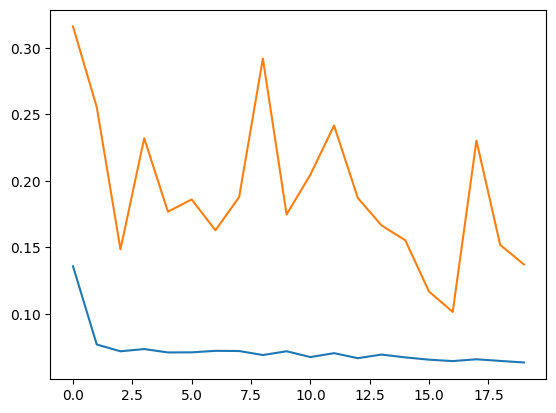

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

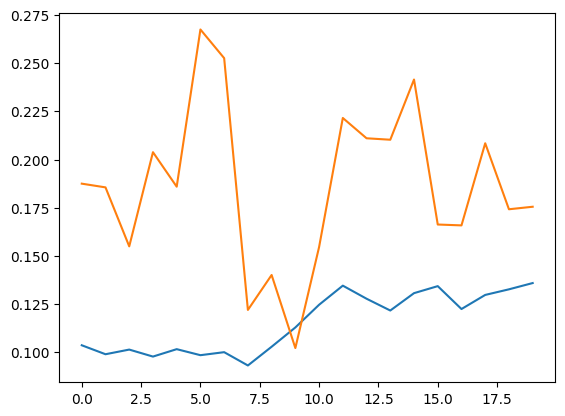

In [24]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])

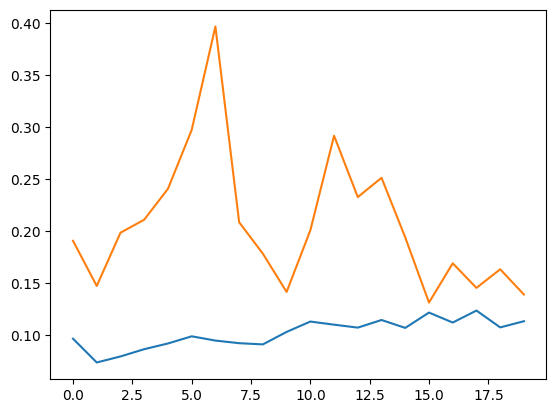

In [25]:
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])

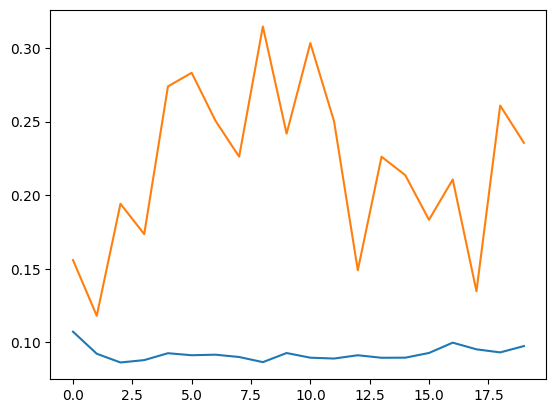

In [26]:
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])

In [27]:
model.evaluate(test_gen, steps=val_steps)

775/775 [==============================] - 2s 2ms/step - loss: 0.2287


0.2287379950284958

In [28]:
model2.evaluate(test_gen, steps=val_steps)

775/775 [==============================] - 4s 5ms/step - loss: 0.1584


0.15842343866825104

In [29]:
model3.evaluate(test_gen, steps=val_steps)

775/775 [==============================] - 7s 8ms/step - loss: 0.1508


0.1508084237575531

In [30]:
model4.evaluate(test_gen, steps=val_steps)

775/775 [==============================] - 16s 21ms/step - loss: 0.2775


0.27746671438217163